# Проверка гипотез по увеличению выручки в интернет-магазине - оценить результаты A/B теста.

## Описание проекта
Используя данные интернет-магазина приоритезировать гипотезы, 
произвести оценку результатов A/B-тестирования различными методами.

1. [Приоритизация гипотез.](#Шаг-1.-Приоритизация-гипотез.)

2. [Анализ А/В теста.](#Шаг-2.-Анализ-А/В-теста.)

2.1 [Подсчитаем кумулятивную выручку по группам.](#Шаг-2.1.-Подсчитаем-кумулятивную-выручку-по-группам,-построим-график.)

2.2 [Подсчитаем кумулятивный средний чек по группам.](#Шаг-2.2.-Подсчитаем-кумулятивный-средний-чек-по-группам,-построим-график.)

2.3 [Построим график относительного изменения кумулятивного среднего чека группы В к группе А.](#Шаг-2.3.-Построим-график-относительного-изменения-кумулятивного-среднего-чека-группы-В-к-группе-А.)

2.4 [Построим график кумулятивной конверсии по группам.](#Шаг-2.4.-Построим-график-кумулятивной-конверсии-по-группам.)

2.5 [Построим график относительного изменения кумулятивной конверсии группы В к группе А](#Шаг-2.5.-Построим-график-относительного-изменения-кумулятивной-конверсии-группы-В-к-группе-А.)

2.6 [Определим аномальных пользователей.](#Шаг-2.6.-Построим-график-количества-заказов-по-пользователям.-Опеределим-аномальных-пользователей.)

2.7 [Определим аномальные заказы.](#Шаг-2.7.-Построим-график-стоимости-заказов.-Опеределим-аномальные-заказы.)

2.8 [Подсчитаем статистическую значимость различий в конверсии между группами по "сырым"данным.](#Шаг-2.8.-Подсчитаем-статистическую-значимость-различий-в-конверсии-между-группами-по-"сырым"-данным.)

2.9 [Подсчитаем статистическую значимость различий в среднем чеке заказа между группами по "сырым" данным.](#Шаг-2.9.-Подсчитаем-статистическую-значимость-различий-в-среднем-чеке-заказа-между-группами-по-"сырым"-данным.)

2.10 [Подсчитаем статистическую значимость различий в конверсии между группами по "очищенным" данным.](#Шаг-2.10.-Подсчитаем-статистическую-значимость-различий-в-конверсии-между-группами-по-"очищенным"-данным.)

2.11 [Подсчитаем статистическую значимость различий в среднем чеке заказа между группами по "очищенным" данным.](#Шаг-2.11.-Подсчитаем-статистическую-значимость-различий-в-среднем-чеке-заказа-между-группами-по-"очищенным"-данным.)

3. [Общий вывод](#Шаг-3.-Общий-вывод.)

Импортирование модулей, необходимых для работы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

### Шаг 1. Приоритизация гипотез.

In [2]:
def df_view(df):
    """
    Быстрый обзор таблицы
    """
    df.rename(str.lower, axis='columns', inplace=True)
    df.columns = df.columns.str.replace(" ", "_")
    print(df.columns)
    display(df)
    display(df.describe())
    a = df.duplicated().sum()
    print(df.info())
    print()
    print('Количество дубликатов в таблице', a)
    

Чтение данных и визуалиция таблицы с помощью универсальной функции

In [3]:
gyp = pd.read_csv('данные предоставлены Яндекс.Практикум')

In [4]:
df_view(gyp)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,reach,impact,confidence,efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Количество дубликатов в таблице 0


In [5]:
pd.set_option('max_colwidth', -1) 

Применим фреймворк ICE для приоритизации гипотез.

In [6]:
gyp['ICE'] = (gyp['impact'] * gyp['confidence']) / gyp['efforts'] 
gyp.sort_values(by='ICE', ascending=False).drop(gyp.columns[[1, 2, 3, 4]], axis=1)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


8 гипотеза самая перспективная, затем идут гипотезы №0, 7 и 6.

Применим фреймворк RICE для приоритизации гипотез.

In [7]:
gyp['RICE'] = (gyp['reach'] * gyp['impact'] * gyp['confidence']) / gyp['efforts'] 
gyp.sort_values(by='RICE', ascending=False).drop(gyp.columns[[1, 2, 3, 4, 5]], axis=1)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Перспективные гипотезы  по RICE №7,2,0 и 6. Несовпадение гипотез по ICE и RICE связано с параметром rich(характеризует охват пользователей), который у появившейся в RICE гипотезe №2 - высокий и составляет 8. А у приоритетной гипотезы по ICE №8 - этот параметр равен 1. 

#### Вывод

Проанализировали таблицу `gyp` с гипотезами, таблица имеет 5 колонок:

- `hypothesis` — краткое описание гипотезы
- `reach` — охват пользователей по 10-балльной шкале
- `impact` — влияние на пользователей по 10-балльной шкале
- `confidence` — уверенность в гипотезе по 10-балльной шкале

Провели приоритизация гипотез по параметрам `ICE` и `RICE`. По `ICE` - 8 гипотеза самая перспективная, затем идут гипотезы №0, 7 и 6. Перспективные гипотезы по RICE №7,2,0 и 6.

Такая разница связана с параметром `rich`(характеризует охват пользователей), который у появившейся в RICE гипотезe №2 - высокий и составляет 8. А у приоритетной гипотезы по ICE №8 - этот параметр равен 1.
Помимо силы гипотез нужно учитывать, как много пользователей они затронут. Поскольку гипотеза №8 `запустить акцию, дающую на товар в день рождения` связана с ограничением во времени, она соответственно охватывает маленькую аудиторию пользователей, что и снижает ее приоритетность.

### Шаг 2. Анализ А/В теста.

Чтение данных и визуалиция таблиц с помощью нашей универсальной функции

In [8]:
orders = pd.read_csv('данные предоставлены Яндекс.Практикум')
df_view(orders)

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,transactionid,visitorid,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Количество дубликатов в таблице 0


In [9]:
visitors = pd.read_csv('данные предоставлены Яндекс.Практикум')
df_view(visitors)

Index(['date', 'group', 'visitors'], dtype='object')


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Количество дубликатов в таблице 0


Проверим представленность обеих групп

In [10]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [11]:
visitors['group'].value_counts()

B    31
A    31
Name: group, dtype: int64

Данные для анализа представлены в двух таблицах. 
    
Таблица `orders` имеет 5 колонок: 
- `transactionId` — идентификатор заказа
- `visitorId` — идентификатор пользователя, совершившего заказ 
- `date` — дата, когда был совершён заказ
- `revenue` — выручка заказа
- `group` — группа A/B-теста, в которую попал заказ
    
Таблица `visitors` имеет 3 колонки: 
- `date` — дата
- `group` — группа A/B-теста
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

Пропущенных значений в таблицах нет, дубликатов нет, названия столбцов приведены к единому нижнему регистру, проверили данные по группам, они соответствуют группам А и В.

#### Шаг 2.1. Подсчитаем кумулятивную выручку по группам, построим график.

Приведем даты к типу `datetime` и к одном формату.

In [12]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


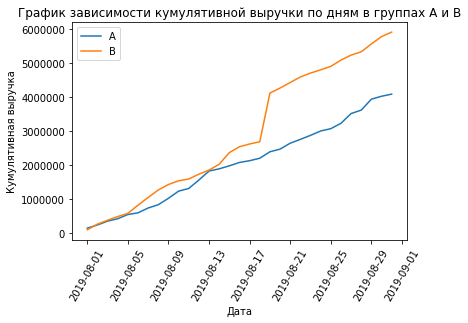

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График зависимости кумулятивной выручки по дням в группах А и В')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend() 
plt.xticks(rotation=60)
plt.show()

Из графика видно, что в группе В выручка растет значительно быстрее, чем в группе А, причем рост начинается практически с самого начала теста. Есть резкие точки роста графиков и А и В группы. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.Особенно это видно в выборке В.

#### Шаг 2.2. Подсчитаем кумулятивный средний чек по группам, построим график.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

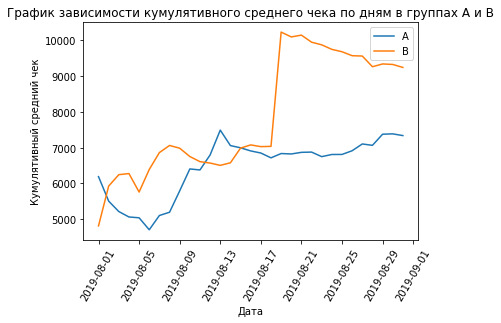

In [15]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График зависимости кумулятивного среднего чека по дням в группах А и В')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend() 
plt.xticks(rotation=60)
plt.show()

Средний чек становится более равномерным ближе к концу теста: установился для группы A после скачков и продолжает снижение для группы B после резкого подъема. Возможно, в группе B примерно в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. Но в целом, в группе В кумулятивный средний чек явно выше, чем в группе А на протяжении теста.

#### Шаг 2.3. Построим график относительного изменения кумулятивного среднего чека группы В к группе А.

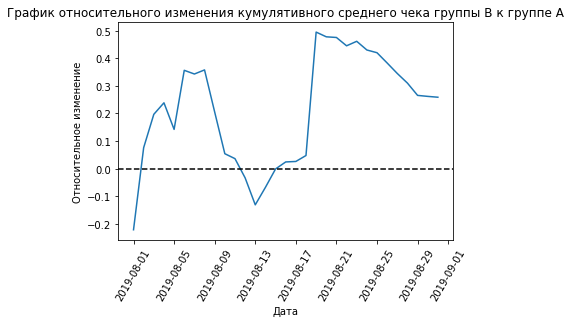

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation=60)
plt.show()

В нескольких точках график резко «скачет» и вверх и вниз. Разница в чеках достигает почти 50%. В группе B явно было несколько дорогих заказов, которые так "сломали" график.

#### Шаг 2.4. Построим график кумулятивной конверсии по группам.

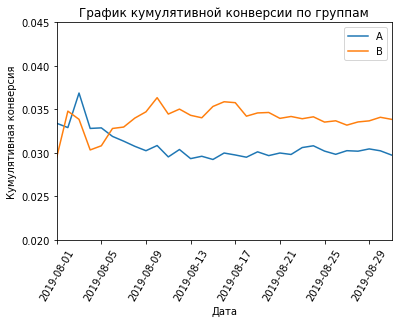

In [17]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0.020, 0.045]) 

plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.xticks(rotation=60)
plt.show()

Сначала группы колебались около одного значения, но затем  практически в первой половине теста конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

#### Шаг 2.5. Построим график относительного изменения кумулятивной конверсии группы В к группе А.

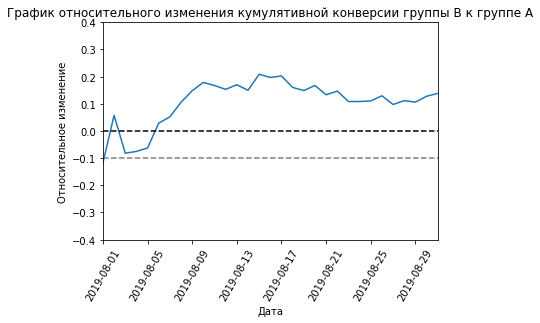

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.4, 0.4])

plt.title('График относительного изменения кумулятивной конверсии группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation=60)
plt.show()

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова незначительно падала, но  теперь постепенно растёт. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. 

#### Шаг 2.6. Построим график количества заказов по пользователям. Опеределим аномальных пользователей.

In [19]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique}))
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

          userId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


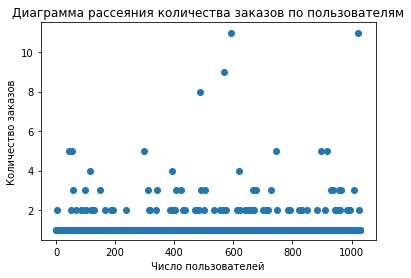

In [20]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Диаграмма рассеяния количества заказов по пользователям')
plt.xlabel('Число пользователей')
plt.ylabel('Количество заказов')
plt.show()

Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. Значительно больше, чем обычный пользователь.Судя по графику большинство пользователей делает 1-2 заказа. Достаточно много пользователей с 3 заказами. Больше 3 заказов редкость. Но их доля точно не ясна, непонятно можно ли считать их выбросами или нет.

Посчитаем 95 и 99 перцентили количества заказов на пользователя.

In [21]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше, чем 2 заказа. И не более 1% заказывали больше 4 раз. Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

#### Шаг 2.7. Построим график стоимости заказов. Опеределим аномальные заказы.

In [22]:
orders.head(10)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [23]:
orders.describe()

,transactionid,visitorid,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


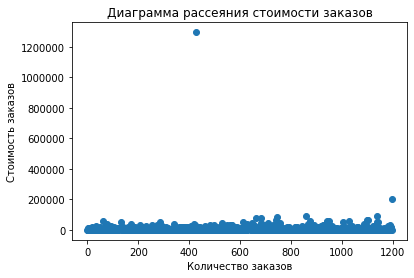

In [24]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Диаграмма рассеяния стоимости заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказов')
plt.show()

Есть немного дорогих заказов, которые могут искажать картину в целом. По графику можно предположить, что граница аномальных заказов проходит между 10000 и 20000 рублей. Подсчитаем 95 и 99 перцентили.

In [25]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей. Выберем за аномальные заказы те, которые больше 28000 рублей.

#### Шаг 2.8. Подсчитаем статистическую значимость различий в конверсии между группами по "сырым" данным.

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Получили общую таблицу со столбцами 
- `date` — дата; 
- `ordersPerDateA` — количество заказов в выбранную дату в группе A
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A
- `ordersPerDateB` — количество заказов в выбранную дату в группе B
- `evenuePerDateB` — суммарная выручка в выбранную дату в группе B
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B

Создадим переменные `ordersByUsersA` и `ordersByUsersB`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [27]:
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Список индексов создали функцией `np.arange()`, а последовательности объединили функцией `pd.concat()`.

In [28]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Проверим распределение на нормальность, используя критерий Шарипо-Уилка. Распределение не является нормальным. Следовательно мы должны использовать непараметрический тест, основанный на структурном подходе. Используем тест Манна-Уитни к полученным выборкам.
    
Примем за статистическую значимость 0.05 поскольку считаем, что такой точности достаточно при проведении маркетингового исследования. У нас не такие большие размеры выборок, следовательно, можно взять большую вероятность ошибки первого рода. При увеличении объема выборки случайные отклонения компенсируют друг друга, и получить значимое различие в выборках при их однородности менее вероятно. Следовательно, тогда надо брать меньший уровень значимости. 
    
Нулевая гипотеза - статистически значимых различий в конверсии между группами А и В нет.
Альтернативная гипотеза - есть различия в конверсии между группами А и В.  

Использовали двусторонний тест 

In [29]:
alpha = 0.05

results = st.shapiro(sampleA) 
p_value = results[1] 
print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально') 
   
else:
    print('нормальное распределение')

p-значение:  0.0
распределение не нормально


In [30]:
alpha = 0.05

results = st.shapiro(sampleB) 
p_value = results[1] 
print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально') 
   
else:
    print('нормальное распределение')

p-значение:  0.0
распределение не нормально


Применим статистический критерий Манна-Уитни к полученным выборкам

In [31]:
print('p-value','{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

print('Относительный прирост конверсии группы B к группе A равен', '{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value 0.017
Относительный прирост конверсии группы B к группе A равен 0.138


Показатель p-value 0.017 < 0.05.  Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы отвергаем. Различия по "сырым данным" есть. При этом прирост конверсии группы В к А составляет 13.8%.

#### Шаг 2.9. Подсчитаем статистическую значимость различий в среднем чеке заказа между группами по "сырым" данным.

In [32]:
checkA = orders[orders['group']=='A']['revenue']
checkB = orders[orders['group']=='B']['revenue']

Проверили распределение на нормальность, подтвердили возможность использование теста Манна-Уитни, добавили параметр для двустороннего теста. 
    
Нулевая гипотеза - нет различий в среднем чеке между группами A и B по "сырым" данным.
Альтернативная гипотеза -средний чек одной из групп отличается от среднего чека другой группы.   


In [33]:
alpha = 0.05

results = st.shapiro(checkA) 
p_value = results[1] 
print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально') 
   
else:
    print('нормальное распределение')

p-значение:  1.739703399801917e-34
распределение не нормально


In [34]:
alpha = 0.05

results = st.shapiro(checkB) 
p_value = results[1] 
print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально') 
   
else:
    print('нормальное распределение')

p-значение:  0.0
распределение не нормально


In [35]:
print('p-value', '{0:.3f}'.format(stats.mannwhitneyu(checkA, checkB, alternative = 'two-sided')[1]))
print('Относительный прирост среднего чека группы B к группе A равен', '{0:.3f}'.format(checkB.mean()/checkA.mean()-1))

p-value 0.729
Относительный прирост среднего чека группы B к группе A равен 0.259


Здесь у нас показатель p-value 0.729 > 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако при этом средний чек группы В на 25% выше среднего чека группы А. 

#### Шаг 2.10. Подсчитаем статистическую значимость различий в конверсии между группами по "очищенным" данным.

Подсчитав выше 95 и 99 перцентили мы решили принять за аномальных пользователей тех, кто совершил больше 2 заказов и совершил заказ дороже 28000 рублей. 
Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`. 

In [36]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())
abnormalUsers.shape

(74,)

Всего таких аномальных пользователей получилось 74. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [37]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0) 


Проверили распределение на нормальность, подтвердили возможность использование теста Манна-Уитни, добавили параметр для двустороннего теста. 
Нулевая гипотеза - нет различий в конверсии между группами A и B по "очищенным" данным.
Альтернативная гипотеза -конверсия одной из групп отличается от конверсии в другой группы по "очищенным" данным.      


In [38]:
alpha = 0.05

results = st.shapiro(sampleBFiltered) 
p_value = results[1] 
print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально') 
   
else:
    print('нормальное распределение')

p-значение:  0.0
распределение не нормально


In [39]:
alpha = 0.05

results = st.shapiro(sampleAFiltered) 
p_value = results[1] 
print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально') 
   
else:
    print('нормальное распределение')

p-значение:  0.0
распределение не нормально


Применим статистический критерий Манна-Уитни к полученным выборкам

In [40]:
print('p-value', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('Относительный прирост конверсии группы B к группе A равен', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value 0.013
Относительный прирост конверсии группы B к группе A равен 0.173


Результаты по конверсии практически не изменились. По "сырым" данным и по "очищенным" одно и то же.

#### Шаг 2.11. Подсчитаем статистическую значимость различий в среднем чеке заказа между группами по "очищенным" данным.

In [41]:
checkAFiltered = orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue']
checkBFiltered = orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue']
    
print('p-value','{0:.3f}'.format(stats.mannwhitneyu(checkAFiltered, checkBFiltered, alternative = 'two-sided')[1]))
print('Относительный прирост среднего чека группы B к группе A равен', '{0:.3f}'.format(checkBFiltered.mean()/checkAFiltered.mean()-1))

p-value 0.738
Относительный прирост среднего чека группы B к группе A равен -0.020


P-value увеличился, и сейчас, когда аномальные значения отброшены, мы видим, что средний чек группы B по отношению практически не изменился.

In [42]:
alpha = 0.05

results = st.shapiro(checkAFiltered) 
p_value = results[1] 
print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально') 
   
else:
    print('нормальное распределение')

p-значение:  3.3050564163703224e-24
распределение не нормально


In [43]:
alpha = 0.05

results = st.shapiro(checkBFiltered) 
p_value = results[1] 
print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально') 
   
else:
    print('нормальное распределение')

p-значение:  1.4698235112376731e-27
распределение не нормально


#### Вывод

По данным проанализировали результаты A/B теста. 

Нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий. Прирост  конверсии группы В к А составляет 13.8% и 15.5% соответственно.

Есть статистически значимое различие по среднему чеку между группами по «сырым» и по данным после фильтрации аномалий. По "сырым" данным прирост среднего чека группы B к А составляет 25%, при этом по "очищенным" данным средний чек в группе В практически не изменился. Большинство дорогих заказов пришлось на группу В.

График различия конверсии между группами сообщает, что результаты группы B значительно лучше группы А: имеют тенденцию к росту.

График различия среднего чека говорит о том, что результаты группы B сейчас на 30% лучше результатов группы А. Но график сильно колеблется и делать по нему определенные выводы нельзя.

На мой взгляд, можно остановить тест, признать его успешным и перейти к проверке следующей гипотезы.


### Шаг 3. Общий вывод.

Пронализировали полученные данные. 

Провели приоритизация гипотез по параметрам ICE и RICE. По ICE - 8 гипотеза самая перспективная, затем идут гипотезы №0, 7 и 6. Перспективные гипотезы по RICE №7,2,0 и 6.
Такая разница связана с параметром rich(характеризует охват пользователей), который у появившейся в RICE гипотезe №2 - высокий и составляет 8. А у приоритетной гипотезы по ICE №8 - этот параметр равен 1. Помимо силы гипотез нужно учитывать, как много пользователей они затронут. 

По данным проанализировали результаты A/B теста. 

Нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий. Прирост  конверсии группы В к А составляет 13.8% и 15.5% соответственно.

Есть статистически значимое различие по среднему чеку между группами по «сырым» и по данным после фильтрации аномалий. По "сырым" данным прирост среднего чека группы B к А составляет 25%, при этом по "очищенным" данным средний чек в группе В практически не изменился. Большинство дорогих заказов пришлось на группу В.

График различия конверсии между группами сообщает, что результаты группы B значительно лучше группы А: имеют тенденцию к росту.

График различия среднего чека говорит о том, что результаты группы B сейчас на 30% лучше результатов группы А.

На мой взгляд, можно остановить тест, признать его успешным и перейти к проверке следующей гипотезы. 
